In [ ]:
from fastai.vision.all import *
from pathlib import Path
import torch, numpy as np, pandas as pd

# Traffic Sign Recognition

We'll build a traffic sign recognizer/classifier for Belgian traffic signs.  The dataset we'll use is downloaded from [people.ee.ethz.ch](https://people.ee.ethz.ch/~timofter/traffic_signs/). See publication:

@inproceedings{Timofte-BMVC-2011,
author = {Radu Timofte and Luc Van Gool},
title  = {Sparse representation based projections},
booktitle = {British Machine Vision Conference},
year   = {2011},
}

@article{Timofte-MVA-2011,
  author = {Radu Timofte and Karel Zimmermann and Luc {Van Gool}},
  title = {Multi-view Traffic Sign Detection, Recognition, and 3D Localisation},
  journal = {Machine Vision and Applications},
  year = {2011}, 
  doi  = {10.1007/s00138-011-0391-3},
}


In [ ]:
# Fetch data from people.ee.ethz.ch
from zipfile import ZipFile
data_path = Path('./traffic-sign')
training_path = untar_data(url='https://people.ee.ethz.ch/~timofter/BelgiumTSC/BelgiumTSC_Training.zip', base=data_path.absolute(), data=data_path.absolute())
testing_path = untar_data(url='http://www.vision.ee.ethz.ch/~timofter/BelgiumTSC/BelgiumTSC_Testing.zip', base=data_path.absolute(), data=data_path.absolute())

NameError: name 'Path' is not defined

## Data Discovery

Let's have a look at one single image from the dataset first, so we know what we're dealing with.

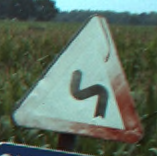

In [ ]:
data_path = Path('./traffic-sign')
training_path = Path(data_path/'BelgiumTSC_Training')
testing_path = Path(data_path/'BelgiumTSC_Testing')
img = PILImage.create(training_path/'00006/00147_00000.ppm')
img.to_thumb(400)

In [ ]:
training_path.absolute()

Path('/home/xstof/code/xstofai/nbs/traffic-sign/BelgiumTSC_Training')

## Build a quick first model

We'll use FastAI to build a quick first model and see how far we get with that:

In [ ]:
fnames = get_image_files(training_path) # gives us something like: [Path('/home/xstof/code/xstofai/nbs/traffic-sign/BelgiumTSC_Training/00006/00221_00000.ppm'),Path('/home/xstof/code/xstofai/nbs/traffic-sign/BelgiumTSC_Training/00006/00327_00001.ppm'),Path('/home/xstof/code/xstofai/nbs/traffic-sign/BelgiumTSC_Training/00006/00326_00001.ppm')]
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(training_path.absolute(), fnames, label_func, valid_ptc=0.2, seed=42, item_tfms=Resize(200))
dls.valid_ds.items[:3]

[Path('traffic-sign/BelgiumTSC_Training/00022/00293_00001.ppm'),
 Path('traffic-sign/BelgiumTSC_Training/00032/01824_00000.ppm'),
 Path('traffic-sign/BelgiumTSC_Training/00034/01214_00002.ppm')]

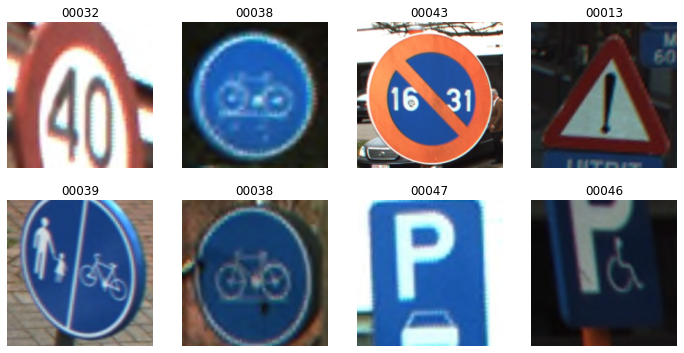

In [ ]:
dls.show_batch(nrows=2, ncols=4)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/home/xstof/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
/home/xstof/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.779933,0.701066,0.178142,08:38


epoch,train_loss,valid_loss,error_rate,time
0,0.526630,0.210330,0.051366,11:58
1,0.243302,0.137209,0.038251,12:14


Let's experiment with using a different learning rate; inspired by the learning rate finder:

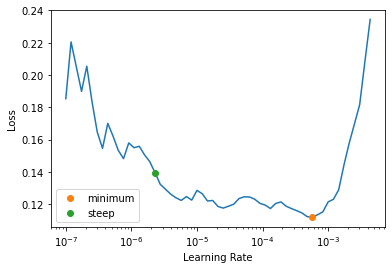

In [ ]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(6, base_lr=3e-4, freeze_epochs=3)

/home/xstof/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
/home/xstof/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,5.710540,4.041673,0.903825,08:05
1,4.238411,1.952239,0.429508,06:13
2,2.704413,1.129371,0.264481,06:34


epoch,train_loss,valid_loss,error_rate,time
0,1.446536,0.846644,0.207650,09:34
1,1.100585,0.523365,0.121311,09:54
2,0.753787,0.365452,0.088525,10:08
3,0.527965,0.292686,0.073224,09:19
4,0.412714,0.269445,0.063388,09:13
5,0.350740,0.266834,0.061202,09:14


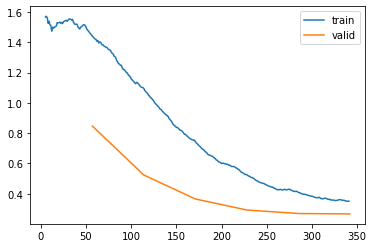

In [ ]:
learn.recorder.plot_loss()

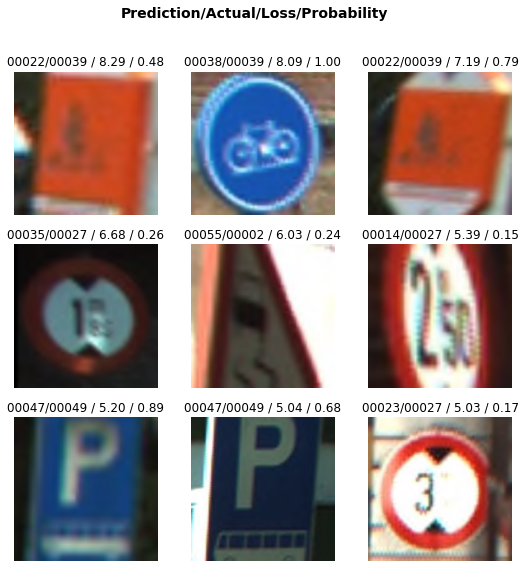

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
# interp.most_confused()
interp.plot_top_losses(9)

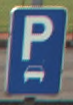

In [ ]:
img = PILImage.create(training_path/'00047/00010_00000.ppm')
img.to_thumb(400)